In [51]:
#import Libraries
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.datasets import fetch_openml
from sklearn.linear_model import SGDClassifier
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_curve
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import Lasso

## Question 1

In [2]:
#Generating 100 random data points satisfying the given equation  
x = np.random.rand(100,1)
noise = np.random.randn(100,1)
y = 2.1*x + 3.4 + noise

In [3]:
#Compute Theta to reduce the cost function
X_b = np.c_[np.ones((100, 1)), x]
theta = np.linalg.inv(X_b.T.dot(X_b)).dot(X_b.T).dot(y)

In [6]:
#Estimating the linear regression model from above generated data
lin_reg = LinearRegression()
lin_reg.fit(X_b, y)
print(lin_reg.intercept_, lin_reg.coef_)

[3.40101535] [[0.         1.90723546]]


In [11]:
##Estimating the gradient descent model from above generated data
rate = 0.4                                                           # learning rate
iterations = 1000
n = 100
theta1 = np.random.randn(2,1)                                         
for i in range(iterations):
    gradient = 2/n * X_b.T.dot(X_b.dot(theta1) - y)
    theta1 = theta1 - rate * gradient
theta1

array([[3.40101535],
       [1.90723546]])

Above results show that the theta values are same for both the models linear regression and gradient descent

In [12]:
rate = 0.1 # learning rate reduced to 0.25 of previoue learning rate
iterations = 1000
n = 100
theta1 = np.random.randn(2,1)                                         
for i in range(iterations):
    gradient = 2/n * X_b.T.dot(X_b.dot(theta1) - y)
    theta1 = theta1 - rate * gradient
theta1

array([[3.40101549],
       [1.9072352 ]])

I ran the exact same steps, just changed the learning rate as mentioned in the question. The difference between the two results is insignificant.

## Question 2

In [15]:
try:
    mnist = fetch_openml('mnist_784', version=1, cache=True)
    mnist.target = mnist.target.astype(np.int8) # fetch_openml() returns targets as strings
    #sort_by_target(mnist) # fetch_openml() returns an unsorted dataset
except ImportError:
    from sklearn.datasets import fetch_mldata
    mnist = fetch_mldata('MNIST original') 

In [16]:
X, y = mnist["data"], mnist["target"]

In [17]:
X_train, X_test, y_train, y_test = X[0:60000], X[60000:],y[0:60000], y[60000:]

In [19]:
#Creating training and testing sample data
train =np.random.randint(0,len(X_train),5000)
test =np.random.randint(0,len(X_test),1000)

In [20]:
X_train_5K = X_train[train]
Y_train_5K = y_train[train]
X_test_1K  = X_test[test]
y_test_1K  = y_test[test]

In [22]:
#Calculate boolean output for 5 and not-5
y_train_5 = (Y_train_5K == 5)
y_test_5 = (y_test_1K == 5) 

In [24]:
#Generate stochastic gradient descent (SGD) classifier object
sgd = SGDClassifier(random_state=100)

In [28]:
#run prediction for 5 or not-5
sgd.fit(X_train_5K, y_train_5)
sgd.predict(X_test_1K[:25])

array([False, False, False, False, False,  True, False, False, False,
       False,  True, False,  True, False, False, False, False, False,
       False, False,  True, False, False,  True, False])

In [30]:
#Check confusion matrix for 5 or not-5
y_train_5_pred = cross_val_predict(sgd, X_train_5K, y_train_5, cv=7)#computing count of predicted y values
confusion_matrix(y_train_5, y_train_5_pred) # actual vs predicted

array([[4384,  105],
       [ 129,  382]], dtype=int64)

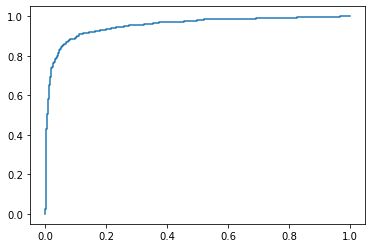

In [37]:
#Check ROC curve
y_train_5_pred_scores = cross_val_predict(sgd, X_train_5K, y_train_5, cv=7, method = "decision_function")
fpr, tpr, thresholds = roc_curve(y_train_5, y_train_5_pred_scores)
plt.plot(fpr, tpr)
plt.show()

In [46]:
#Check accuracy for 5 or not-5
cross_val_score(sgd, X_train_5K, y_train_5, cv=7, scoring="accuracy")

array([0.95524476, 0.94545455, 0.94817927, 0.95098039, 0.95658263,
       0.95658263, 0.95938375])

In [40]:
#Calculate boolean output for 6 and not-6
y_train_6 = (Y_train_5K == 6)
y_test_6 = (y_test_1K == 6) 

In [42]:
#run prediction for 6 or not-6
sgd.fit(X_train_5K, y_train_6)
sgd.predict(X_test_1K[:25])

array([False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False])

In [43]:
#Check confusion matrix for 6 or not-6
y_train_6_pred = cross_val_predict(sgd, X_train_5K, y_train_6, cv=7)#computing count of predicted y values
confusion_matrix(y_train_6, y_train_6_pred) # actual vs predicted

array([[4429,   75],
       [  59,  437]], dtype=int64)

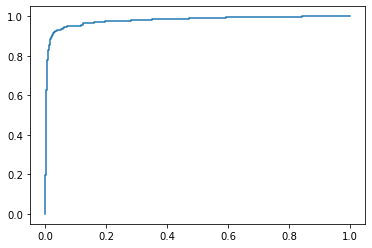

In [44]:
y_train_6_pred_scores = cross_val_predict(sgd, X_train_5K, y_train_6, cv=7, method = "decision_function")
fpr1, tpr1, thresholds = roc_curve(y_train_6, y_train_6_pred_scores)
plt.plot(fpr1, tpr1)
plt.show()

In [45]:
#Check accuracy for 6 or not-6
cross_val_score(sgd, X_train_5K, y_train_6, cv=7, scoring="accuracy")

array([0.96923077, 0.96923077, 0.97058824, 0.97338936, 0.97478992,
       0.9719888 , 0.98319328])

Based on the ROC Curve and the accuracy results for "5 or not-5" and "6 or not-6", I can conclude that "6 or not-6" performed better than "5 or not-5"

## Question 3

In [48]:
#generating equation
m = 50 # number of data points
x = 6 * np.random.rand(m,1) - 3
y = 4*(x**2) + 3*x + 2 + 2*np.random.randn(m,1) #polynomial equation

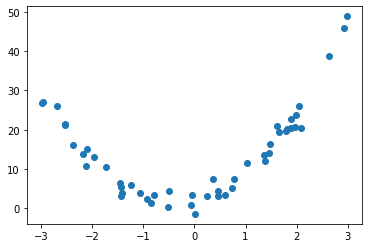

In [50]:
#checking the plot for the above generated data points
plt.scatter(x,y)
plt.show()

In [52]:
#un-regularized model
num_degrees = 5
poly_features = PolynomialFeatures(degree=num_degrees, include_bias=False)
x_poly = poly_features.fit_transform(x)

x_train, x_test, y_train, y_test = train_test_split(x_poly, y, test_size=0.2)
lreg = LinearRegression()
lreg.fit(x_train, y_train)
print(lreg.intercept_, lreg.coef_)
y_predict = lreg.predict(x_test)
mse = mean_squared_error(y_test,y_predict)
print("Mean Squared Error on Test: ", mse)

[2.26074057] [[ 3.63082111e+00  3.96983700e+00 -3.16679209e-01  7.04728718e-04
   3.26360170e-02]]
Mean Squared Error on Test:  5.774852358328509


In [53]:
#regularized model
order = x_test[:,0].argsort()
x_test = x_test[order]
ys = y_predict[order]
truey = y_test[order]

from sklearn.linear_model import Lasso
lasso_reg = Lasso(alpha=0.5)
lasso_reg.fit(x_train, y_train)
y_predict = lasso_reg.predict(x_test)
mse = mean_squared_error(truey,y_predict)
print("Mean Squared Error on Test: ", mse)
print(lasso_reg.intercept_, lasso_reg.coef_)

Mean Squared Error on Test:  6.051179218063333
[3.1268028] [ 1.91862598  3.30523828  0.32669661  0.07804036 -0.01895783]
